# Computation of LMC diffuse Background

https://notebook.community/obscode/bootcamp/MoreNotebooks/AstropySmorgasbord


The first step is to find good images of the LMC



In [179]:
from astroquery.ned import Ned
from astropy import coordinates
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import numpy as np

In [180]:
import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [181]:
from astropy.coordinates import Angle
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

# Simbad

In [182]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("LMC")
result_table 

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME LMC,05 23 34.6,-69 45 22,5,5,--,--,0,D,O,2003A&A...412...45P


In [183]:
result_table["RA","DEC"]

RA,DEC
"""h:m:s""","""d:m:s"""
str13,str13
05 23 34.6,-69 45 22


In [184]:
Angle(result_table["RA"][0],unit='hourangle')

<Angle 5.39294444 hourangle>

In [185]:
lmc_ra=Angle(result_table["RA"][0],unit='hourangle').degree
lmc_ra

80.89416666666666

In [186]:
Angle(result_table["DEC"][0],unit='degree')

<Angle -69.75611111 deg>

In [187]:
lmc_dec=Angle(result_table["DEC"][0],unit='degree').degree
lmc_dec

-69.75611111111111

# Ned query

In [188]:
result_table = Ned.query_object("lmc")
print(result_table)


No.      Object Name           RA     ... Diameter Points Associations
                            degrees   ...                             
--- ---------------------- ---------- ... --------------- ------------
  1 Large Magellanic Cloud   80.89386 ...               6            0


In [189]:
print(result_table.keys())

['No.', 'Object Name', 'RA', 'DEC', 'Type', 'Velocity', 'Redshift', 'Redshift Flag', 'Magnitude and Filter', 'Separation', 'References', 'Notes', 'Photometry Points', 'Positions', 'Redshift Points', 'Diameter Points', 'Associations']


In [190]:
result_table.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,Large Magellanic Cloud,80.89386,-69.75613,G,278.0,0.000927,,0.9,--,7012,9,51,25,14,6,0


In [191]:
#result_table = Ned.query_region("lmc", radius=500 * u.arcmin)
#print(result_table)

# Gaia

In [192]:
from astroquery.gaia import Gaia

In [193]:
coord = coordinates.SkyCoord(ra=80.89386, dec=-69.75613, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(500.0, u.arcmin)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()

r.pprint()
print(r.keys())


INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             designation          ...          dist         
                                                 ...                       
------------------- ---------------------------- ... ----------------------
1635721458409799680 Gaia DR2 4657980130919764608 ... 0.00036756773940475835
1635721458409799680 Gaia DR2 4657980131012038144 ...  0.0006114821864901924
1635721458409799680 Gaia DR2 4657980131012266752 ...  0.0007397826316775604
1635721458409799680 Gaia DR2 4657980135236389376 ...  0.0008060626794050489
1635721458409799680 Gaia DR2 4657980131012035072 ...  0.0009119131064518382
1635721458409799680 Gaia DR2 4657980135236377856 ...  0.0010608806052289563
1635721458409799680 Gaia DR2 4657980135281357184 ...   0.001093386812628391
1635721458409799680 Gaia DR2 4657980131012039040 ...  0.0011627375706958264
1635721458409799680 Gaia DR2 4657980135236380160 ...   0.001179589478968457
1635721458409799680 Gaia DR2 465798013

In [194]:
r.show_in_notebook()

idx,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
0,1635721458409799680,Gaia DR2 4657980130919764608,4657980130919764608,921276189,2015.5,80.89282393782491,0.058654101408195755,-69.75604976132611,0.06620107162843228,0.018988351173106148,0.06408459311862477,0.29630134,2.059459109515737,0.10740136400118133,0.3903603744062611,0.12308210645512245,0.07963464,0.15371415,-0.1685369,0.06845753,0.2972402,0.16475706,-0.38309363,0.19830401,-0.3207607,0.04802748,211,0,211,0,0.44106418,214.39755,0.0,0.0,31,False,2.8475156,1.5122638987946215,0.017071335002215974,0.0015552931,24,19,0.12061976,0,27,False,237,2727.320482259178,2.4852844363359567,1097.3877,17.099026,25,1549.2484904781245,19.163385333561198,80.8442,17.376085,25,2527.0182300858855,18.59314422192864,135.91129,16.2554,1.494605,0,1.1206856,0.27705956,0.843626,--,--,0,--,--,--,NOT_AVAILABLE,280.46524702744404,-32.88886823964649,312.5128711336989,-85.35122844121351,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+4657980130919764608,0.00036756773940475835
1,1635721458409799680,Gaia DR2 4657980131012038144,4657980131012038144,1522605965,2015.5,80.89539404188278,0.4416387175027235,-69.7564369520932,0.4743225784976154,-1.0390458936336373,0.4632522464480239,-2.2429376,-2.2474620948568216,0.9016083367468047,4.815027549343308,0.8334444421699704,-0.0180408,0.2613312,0.17815791,-0.07353926,0.31656334,0.048622984,-0.53607374,0.14246471,-0.39254302,-0.114253685,121,0,120,1,9.9765,340.9769,2.5027211895055554,14.45526855901338,31,False,0.10114877,1.4505739531844886,0.12009949933843088,-0.17896646,14,13,0.84606504,0,18,False,148,476.7202195775209,2.0805631943171816,229.13037,18.992706,0,--,--,--,--,0,--,--,--,--,--,2,--,--,--,--,--,0,--,--,--,NOT_AVAILABLE,280.4655053216512,-32.88792287399057,312.502249382916,-85.35167536755299,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+4657980131012038144,0.0006114821864901924
2,1635721458409799680,Gaia DR2 4657980131012266752,46

In [195]:
t=r["ra","dec","phot_bp_mean_mag","phot_bp_n_obs","phot_rp_mean_mag","phot_rp_n_obs"]

In [196]:
t

ra,dec,phot_bp_mean_mag,phot_bp_n_obs,phot_rp_mean_mag,phot_rp_n_obs
deg,deg,mag,,mag,
float64,float64,float32,int32,float32,int32
80.89282393782491,-69.75604976132611,17.376085,25,16.2554,25
80.89539404188278,-69.7564369520932,--,0,--,0
80.89396188156547,-69.75687395379747,--,0,--,0
80.89598531243595,-69.75580717068308,--,0,--,0
80.89122592558347,-69.75618632525166,--,0,--,0
80.89093554667507,-69.75581344264238,--,0,--,0
80.89214364271321,-69.75705372450356,17.491165,18,16.465424,18
80.89622997900784,-69.75695841802643,18.411417,4,17.644585,3


In [197]:
from astropy import wcs
# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [-234.75, 8.3393]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.crval = [0, -90]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])

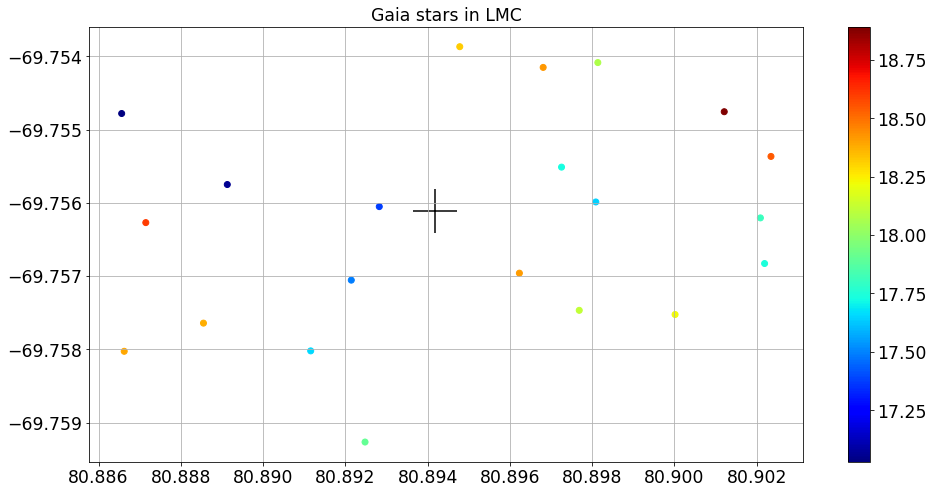

In [198]:
import matplotlib.cm as cm

#ax = plt.subplot(projection=w)
ax=plt.subplot()    
im=ax.scatter(t["ra"], t["dec"], c=t["phot_bp_mean_mag"], cmap=cm.jet)
ax.set_aspect("auto")
ax.grid()
plt.colorbar(im, ax=ax)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.scatter([lmc_ra],[lmc_dec],marker="+",s=2000,color='k')
ax.set_title("Gaia stars in LMC")
ax.set_aspect("auto")


## SkyView

In [199]:
from astroquery.skyview import SkyView

In [200]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [201]:
#pflist = SkyView.get_images(position='lmc', survey=['SDSSr'],radius=10 * u.arcmin)

## SWIFT UVPhot

https://swift.gsfc.nasa.gov/about_swift/uvot_desc.html

In [202]:
the_survey=['UVOT WHITE Intensity','UVOT V Intensity','UVOT B Intensity','UVOT U Intensity']

In [203]:
pflist=SkyView.get_images(position='lmc', survey=the_survey,radius=600 * u.arcmin)

In [204]:
N=len(pflist)

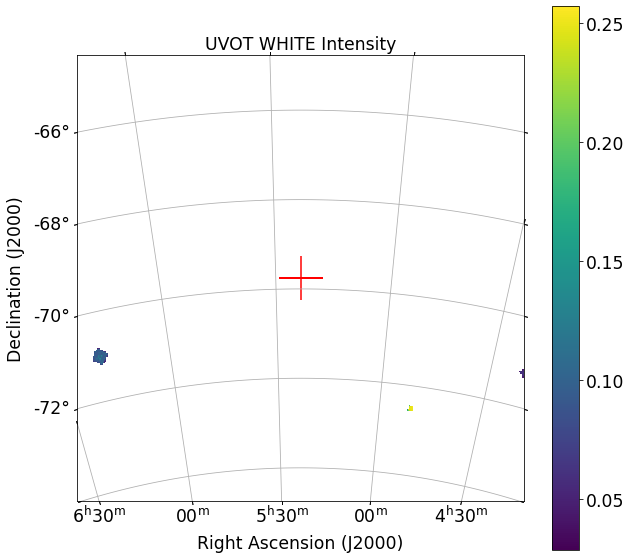

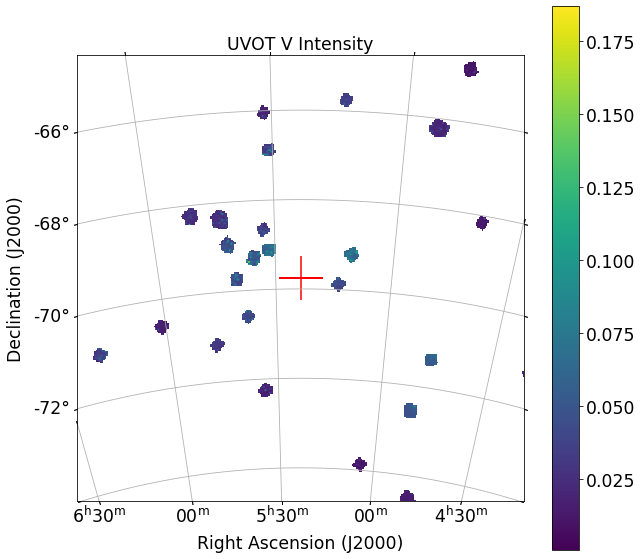

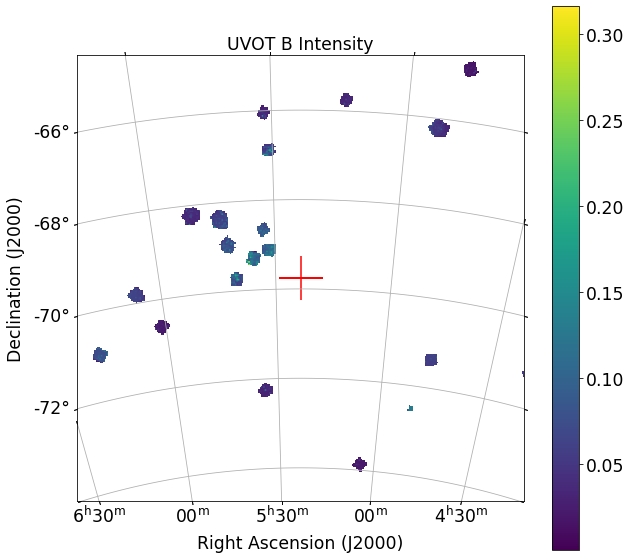

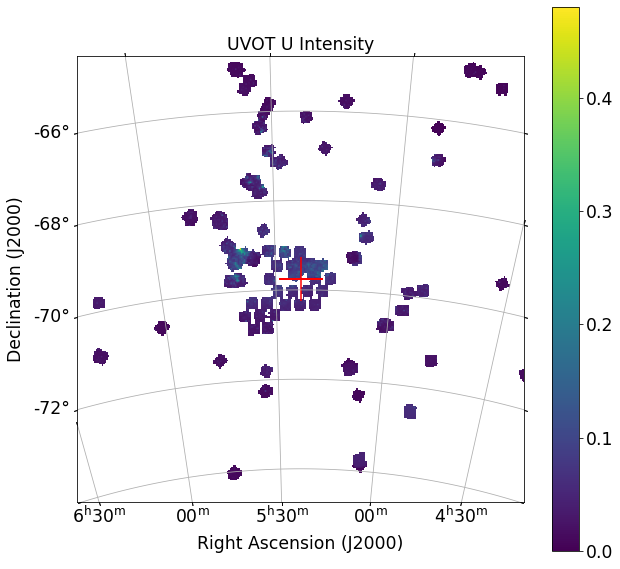

In [205]:
all_head=[]
for ext in np.arange(N):
    pf = pflist[ext] # first element of the list, might need a loop if multiple images
    image = pf[0].data

    head = pf[0].header
    wcs = WCS(head)
    
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=wcs)
    im=ax.imshow(image, cmap='viridis', origin='lower')
    #ax.grid(color='white', ls='solid')
    ax.set_xlabel('Right Ascension (J2000)')
    ax.set_ylabel('Declination (J2000)')
    the_title="{}".format(the_survey[ext])
    ax.set_title(the_title)
    ax.grid()
    plt.colorbar(im, ax=ax)
    sky=SkyCoord(lmc_ra*u.degree,lmc_dec*u.degree)
    x,y=wcs.world_to_pixel(sky)
    ax.scatter([x],[y],marker="+",s=2000,color='r')
    plt.show()
    
    all_head.append(head)

In [206]:
all_head[2]

SIMPLE  =                    T / Written by SkyView Tue Jun 22 09:09:16 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              80.8942 / Reference longitude                            
CRVAL2  =             -69.7561 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

## HST

In [207]:
#'GOODS: HST ACS B',
#'GOODS: HST ACS V',
#'GOODS: HST ACS I',

the_survey=['GOODS: HST ACS B','GOODS: HST ACS V','GOODS: HST ACS I']

In [208]:
#pflist=SkyView.get_images(position='lmc', survey=the_survey,radius=600 * u.arcmin)

# Mellinger

In [209]:
the_survey=['Mellinger Red','Mellinger Green','Mellinger Blue','H-Alpha Comp']

In [210]:
pflist=SkyView.get_images(position='lmc', survey=the_survey,radius=1200 * u.arcmin)

In [211]:
N=len(pflist)

 [astropy.io.fits.verify]


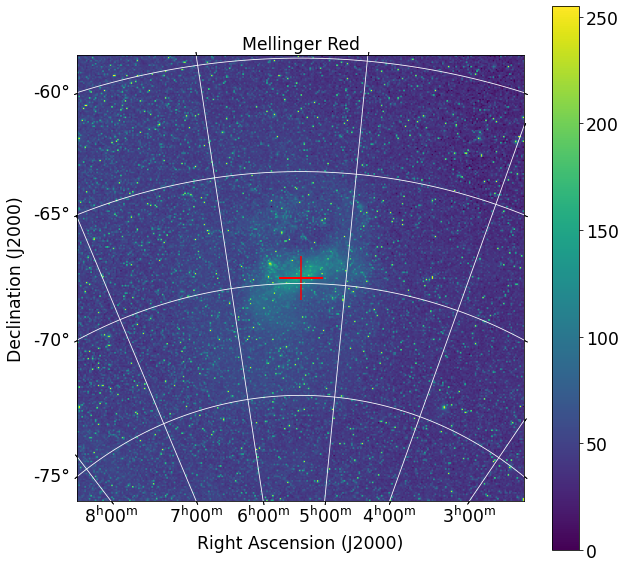

 [astropy.io.fits.verify]


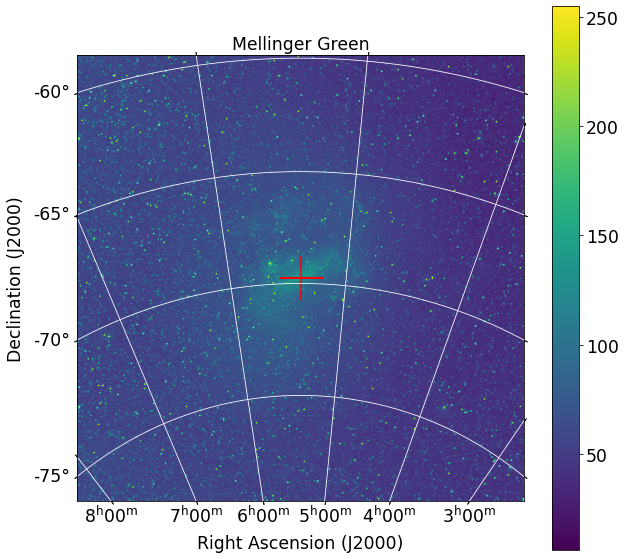

 [astropy.io.fits.verify]


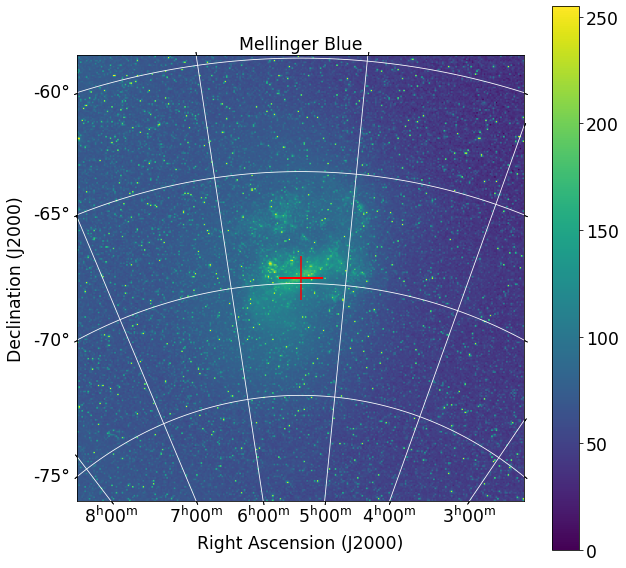

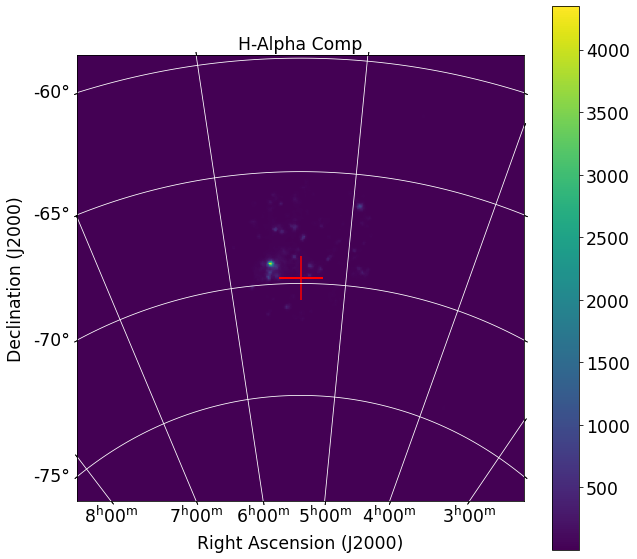

In [212]:
all_headers=[]
all_images=[]
all_wcs=[]
for ext in np.arange(N):
    pf = pflist[ext] # first element of the list, might need a loop if multiple images
    image = pf[0].data

    head = pf[0].header
    wcs = WCS(head)
    
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=wcs)
    #ax = plt.subplot(projection=wcs)
    im=ax.imshow(image, cmap='viridis', origin='lower')
    #ax.grid(color='white', ls='solid')
    ax.set_xlabel('Right Ascension (J2000)')
    ax.set_ylabel('Declination (J2000)')
    the_title="{}".format(the_survey[ext])
    ax.set_title(the_title)
    ax.grid(color="w")
    plt.colorbar(im, ax=ax)
    sky=SkyCoord(lmc_ra*u.degree,lmc_dec*u.degree)
    x,y=wcs.world_to_pixel(sky)
    ax.scatter([x],[y],marker="+",s=2000,color='r')
    plt.show()
    
    all_headers.append(head)
    all_images.append(image)
    all_wcs.append(wcs)

In [213]:
#all_headers[0]

In [214]:
all_images[0].shape

(300, 300)

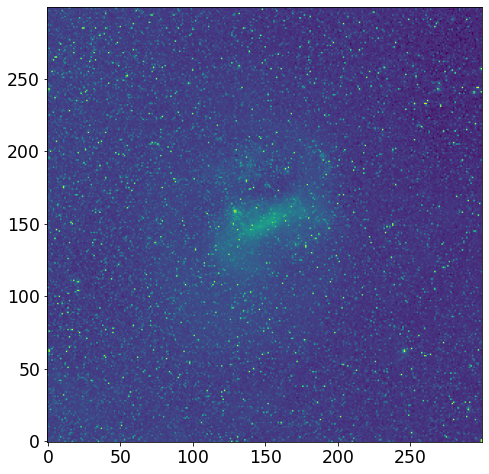

In [215]:
plt.imshow(all_images[0],origin="lower")

In [216]:
X=np.arange(all_images[0].shape[1])
Y=np.arange(all_images[0].shape[0])

In [217]:
xv, yv = np.meshgrid(X, Y)

In [218]:
yv

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [297, 297, 297, ..., 297, 297, 297],
       [298, 298, 298, ..., 298, 298, 298],
       [299, 299, 299, ..., 299, 299, 299]])

# Calcul du bruit de fond en fonction de la distance

### Hypothese de symetrie circulaire

In [219]:
def GetCircle(image,wcs,ra0,dec0,RMIN,RMAX):
    """
    Extract a Circle in the image between RMIN and RMAX
    
    input arg:
     - image : input image
     - wcs   : wcs allowing to convert image pixel into world coordinate
     - ra0,dec0 : center of the image (assummed to be LMC center)
     - RMIN : all pixels r<RMIN are set to 0
     - RMAX : all pixels r>RMAX are set to 0
     
     output:
     - image with the ring
    
    """
    X=np.arange(all_images[0].shape[1])
    Y=np.arange(all_images[0].shape[0])
    
    xv, yv = np.meshgrid(X, Y)
    sky = wcs.pixel_to_world(xv, yv)
    sky_center=SkyCoord(ra0*u.deg,dec0*u.deg)
    
    sky_sep=sky.separation(sky_center)
    sky_sep_arcmin=sky_sep.arcmin
    
    
    new_image=np.where(np.logical_or(sky_sep_arcmin<RMIN,sky_sep_arcmin>=RMAX),0,image)
    
    return new_image

In [220]:
idx=0
the_image=all_images[idx]
the_wcs=all_wcs[idx]

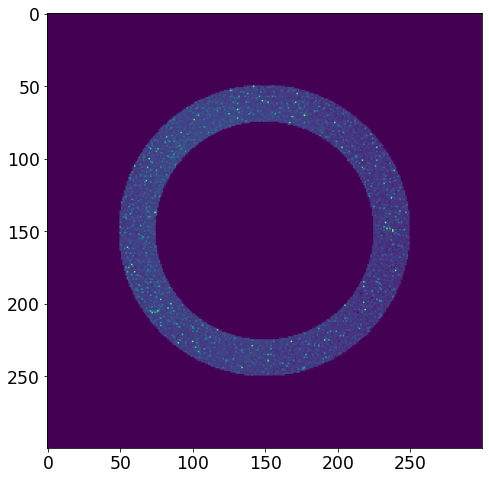

In [221]:
plt.imshow(GetCircle(the_image,the_wcs,lmc_ra,lmc_dec,300,400))

In [222]:
rmin=np.arange(0,590,10)
rmax=rmin+10
rav=(rmin+rmax)/2
NBINS=len(rmin)

In [223]:
average_background=np.zeros(NBINS)

In [233]:
for ibin in np.arange(NBINS):
    the_surface=np.pi*(rmax[ibin]**2-rmin[ibin]**2)
    new_image=GetCircle(the_image,the_wcs,lmc_ra,lmc_dec,rmin[ibin],rmax[ibin])
    good_pixels=np.where(new_image>0) # do not average over empty pixels
    good_data=new_image[good_pixels]
    average_background[ibin]=np.median(good_data.ravel())

In [230]:
good_data

array([62., 49., 39., ..., 38., 38., 41.], dtype=float32)

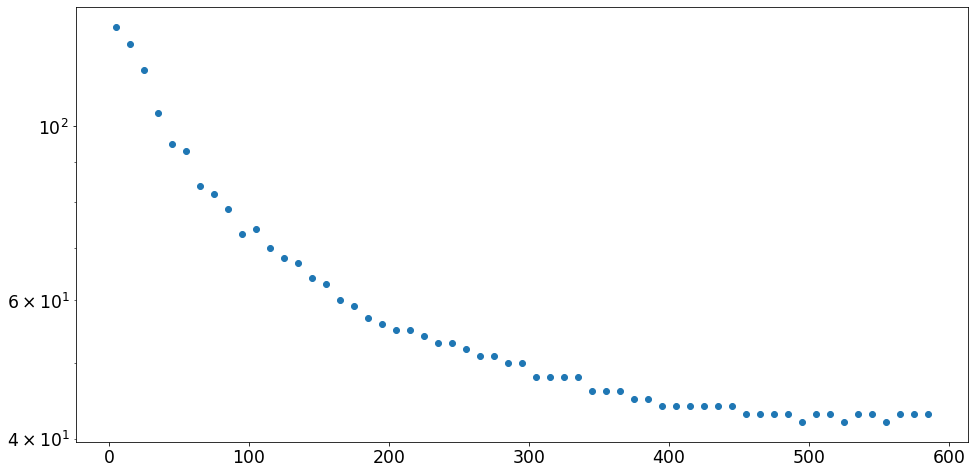

In [235]:
plt.plot(rav,average_background,"o")
plt.yscale("log")